
# Hands-on Quantum Computing with Qiskit

<!-- <img src="img/mission10000.png" align="center"> -->

&nbsp;


&nbsp;

## Contents<a id='index'></a>

&nbsp;

&nbsp; &nbsp; 1. [Introduction](#introduction)

&nbsp; &nbsp; 2. [Single-qubit gates](#single_gates)

&nbsp; &nbsp; 3. [Multi-qubit gates](#multi_qubits)

&nbsp; &nbsp; 4. [Quantum Half-Adder](#qhd)

&nbsp; &nbsp; 5. [IBM Q Provider](#ibmq_provider)

&nbsp; &nbsp; 6. [Quantum Teleportation](#teleport)


&nbsp;

&nbsp;

# 1. Introduction<a id='introduction'></a>


&nbsp;

## QISKit - an overview<a id='qiskit_overview'></a>

<img src="img/qiskit-heading.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

Qiskit is an open-source framework for working with quantum computers at the level of algorithms, quantum circuits, or even pulses. It can be installed and executed locally, but to execute your code in actual, public access quantum processors, you need to create a [IBM Quantum experience](https://quantum-computing.ibm.com) account.

Qiskit supports the *Python* language, which is itself compatible with multiple programming paradigms.


The main pillar of this toolkit (which the majority of this session will feature) is **Qiskit Terra**.

&nbsp;

&nbsp;

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="img/qiskit_modules.jpg" alt="Qiskit and its elements" width="700px" style="padding-bottom:0.5em;" />
    Qiskit and its elements (<a href="https://medium.com/qiskit/qiskit-and-its-fundamental-elements-bcd7ead80492">Source</a>)
</div>

&nbsp;



As of version `0.24`, Qiskit is composed of other 3 main modules:

**Aer** is a simulator framework for the stack. Note that these simulations are performed on classical computers, and so are limited by classical resources.

**Ignis** is a framework for understanding and mitigating noise in quantum circuits and systems.

**Aqua** provides higher-level functionality by use of a library of quantum algorithms upon which applications of near term quantum computing can be built.

Qiskit is still under an intense development cycle, which means that new updates and features are added several times a year.

<div class="alert alert-block alert-info">

**Importing Qiskit**

&nbsp;

The following sections will make use of Qiskit to design and visualize circuits and quantum operations. 

**The execution of the code cells in this notebook requires that the relevant Qiskit modules be imported first.**
    
To execute a code block, select a code cell and press `SHIFT + ENTER`. Consecutive cells can be executed by repeating this command.

</div>

In [1]:
# Comments on code cells are preceded by '#'

# Relevant QISKit modules

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ, Aer, BasicAer, execute, transpile, assemble
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.widgets import binary_widget
from qiskit_textbook.tools import array_to_latex, random_state

# Useful additional packages 

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import sqrt, pi

from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "last_expr"


# Output a message to confirm all modules are imported

print("Modules successfully imported.")

Modules successfully imported.


&nbsp;

## Splitting information into bits

&nbsp;

Binary code uses essentially the worlds simplest alphabet. With only two characters, 0 and 1, we can represent any piece of information.

One example is numbers. For example, when we write `213`, we mean

$$(2\times10^2) + (1\times10^1) + (3\times10^0) $$

Though we usually use this system based on the number 10, we can just as easily use one based on any other number. In binary, 213 becomes `11010101`, since


$$ 213  = (1 \times 2^7) + (1 \times 2^6) + (0 \times 2^5) + (1 \times 2^4) + (0 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0) $$



In this we are expressing numbers as multiples of 2, 4, 8, 16, 32 instead of 10, 100, 1000, etc.

&nbsp;

In [2]:
binary_widget(nbits=8)

HTML(value='<pre>Binary     Decimal\n 00000000 = 0</pre>')

&nbsp;

## The quantum bit<a id='quantum_bit'></a>

&nbsp;

### A physical qubit

Any quantum system with two orthogonal states can be used to represent a quantum bit, or *qubit* for short.

<img src="img/h_atom.png" width="200px" align="center">




How can we represent quantum states and associated operations?

&nbsp;

### Qubit notation

Classical bits always have a completely well-defined state: they are either `0` or `1` at every point during a computation. To write down the state of a of classical bit (`c`), we can just use these two binary values. For example:

    c = 0

This restriction is lifted for quantum bits. Whether we get a `0` or a `1` from a qubit only needs to be well-defined when a measurement is made to extract an output. At that point, it must commit to one of these two options. At all other times, its state will be something more complex than can be captured by a simple binary value.


It is possible to prepare a qubit in a state for which it definitely gives the outcome `0` when measured. We need a name for this state. Let's call it $0$ . Similarly, there exists a qubit state that is certain to output a `1`. We'll call this $1$. These two states are completely mutually exclusive. Either the qubit definitely outputs a ```0```, or it definitely outputs a ```1```. There is no overlap. One way to represent this with mathematics is to use two orthogonal vectors.

$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, |1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$

First, let's unpack the weird $|$ and $\rangle$. Their job is essentially just to remind us that we are talking about the vectors that represent qubit states labelled $0$ and $1$. This helps us distinguish them from things like the bit values ```0``` and ```1``` or the numbers 0 and 1.


&nbsp;

A single qubit quantum state $|\psi\rangle$ can be written as a superposition of its basis states, which by convention are generally named $|0\rangle$ and $|1\rangle$.

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$

Here, $\alpha$ and $\beta$ are probability amplitudes generally described by [complex numbers](https://www.scottaaronson.com/blog/?p=4021). When the qubit is measured, the quantum system "collapses" to the state $|0\rangle$ with probability $|\alpha|^2$, or to the state $|1\rangle$ with probability $|\beta|^2$. **As such, the sum of squared amplitudes of a quantum state is 1:** 

$$|\alpha|^2 + |\beta|^2 = 1$$


$|\psi\rangle$ can also be represented as a column vector of coefficients of basis states:

$$
|\psi\rangle =  
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}.
$$

&nbsp;

<div class="alert alert-block alert-info">
    
**Building your first quantum circuit**

&nbsp;

In Qiskit `0.24`, a `QuantumCircuit(q,b)` object needs to be defined, together with the number `q` of qubits. To perform measurements, we also need to define `b`, the number of bits to contain the results of the measurement. 

&nbsp;

In a quantum circuit, each qubit is initialized in the state $|0\rangle$ by default. The method `initialize(array, q)` takes an `array` representing a statevector, and initializes qubit `q` in that state.

&nbsp;

The measurement operation `measure(q_i, b_j)` is called by specifying the correspondence between qubit `i` to be measured, and the bit `j` which is to store the measurement value. Alternatively, `measure_all()` automatically measures all qubits in the circuit.

&nbsp;

A complete circuit can be visualized graphically by calling the `draw` method.

</div>

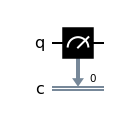

In [3]:
# Set numbet of qubits and bits
n_qubits = 1
n_bits = n_qubits

# Quantum circuit
qc = QuantumCircuit(n_qubits, n_bits)

# Optional: set initial state (|0> by default)
#initial_state = [1/sqrt(2),1/sqrt(2)]
#qc.initialize(initial_state, 0)

# Measure qubits
for i in range(n_qubits):
    qc.measure(i,i)

# Draw circuit 
qc.draw(output='mpl')

&nbsp;

<div class="alert alert-block alert-info">
    
**Simulating measurements in a quantum circuit**
    
&nbsp;

The **Aer** component allows for the simulation of the execution and measurement of a quantum circuit, locally, for a small number of qubits, using the `qasm_simulator`.

&nbsp;

For that, we need to call the simulator using the `BasicAer.get_backend` method. We then define a *job*, i.e. the task assigned to a specific backend - simulator or real quantum processor - by calling the function `execute(qc, backend, shots)`, where `qc` is the quantum circuit to be executed, `backend` is the execution backend, and `shots` is the number of executions to be performed.

&nbsp;

After the job is executed, we can extract a `result()`, which allows us to get the measurement result frequencies with `get_counts()`, and, from that, plot an histogram of probabilities with the function `plot_histogram(counts)`.


</div>

{'0': 1000}


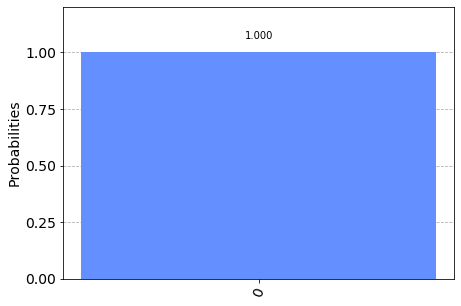

In [4]:
sim_backend = BasicAer.get_backend("qasm_simulator")

job = execute(qc, sim_backend, shots=1000)

counts = job.result().get_counts()

print(counts)

plot_histogram(counts)

&nbsp; 

### Rules of measurement - the observer effect

&nbsp;

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

&nbsp;

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

&nbsp;

And find it in the state $|0\rangle$, if we measure again, there is a 100% chance of finding the qubit in the state $|0\rangle$. This means the act of measuring _changes_ the state of our qubits.

&nbsp;

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

&nbsp;

We sometimes refer to this as _collapsing_ the state of the qubit. After measurement, qubits are no different from classical bits and our computation can be easily replaced by a classical computation. To achieve truly quantum computation we must allow the qubits to explore more complex states. 

**Measurements are therefore only used when we need to extract an output.** This means that we often place all the measurements at the end of our quantum circuit. 


&nbsp;

<div class="alert alert-block alert-info">
    
**Statevector simulator**

&nbsp;

Quantum states can be verified through **Aer** simulators, such as the `statevector_simulator`. This simulator is able to determine the vector describing the state of all qubits at a given point.

&nbsp;

To use it, we only need to define the the statevector simulator as our execution backend.

&nbsp;

**Note**: To get accurate results from the statevector simulator, no measurement operations can be applied to the circuit, since measurements collapse superposition states into deterministic ones.

</div>

In [5]:
# Single-qubit circuit
qc = QuantumCircuit(1,1)

# Initialize qubit in superposition
initial_state = [1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state, 0)

# What if we measure before getting the state?
#qc.measure(0,0)

# Get statevector simulator backend
sv_backend = Aer.get_backend("statevector_simulator")

# Get statevector from simulator, display it
statevector = execute(qc, sv_backend).result().get_statevector()
array_to_latex(statevector, pretext="\\text{Statevector} = ")


<IPython.core.display.Math object>

&nbsp;

### Bloch sphere - a visual representation of a qubit state

&nbsp;

The absolute squares of the probability amplitudes, $|\alpha|^2$ and $|\beta|^2$, represent the probability of the corresponding measurement outcome. A basic rule for probability is that the probabilities of all possible outcomes must add up to $1$, so it follows that $\alpha$ and $\beta$ must be constrained by the equation:

$$|\alpha|^2+ |\beta|^2 = 1$$

Ignoring the global phase of a qubit, only two real numbers are required to describe a single qubit quantum state. A convenient representation is

$$|\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)e^{i\phi}|1\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  

It is then possible to create a one-to-one correspondence between a qubit state ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

<img src="img/Bloch_sphere.png" alt="" width="300 px" align="center">

By contrast, a representation of a classical bit over the Bloch sphere would only require the two points of the sphere intersecting the Z axis.

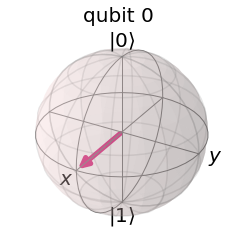

In [6]:
# Draw Bloch sphere from statevector
plot_bloch_multivector(statevector)

&nbsp;

# 2. Single qubit operations<a id='single_gates'></a>

&nbsp;

Quantum gates/operations are generally expressed as matrices. The action of the quantum gate on the qubit is determined by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

Some of the single-qubit operations available are:

- Pauli gates
- Hadamard gate
- Measurement gates


## Pauli gates

#### Gate $X$: bit-flip gate 

The X-gate is also known as NOT gate or “bit-flip”, since it changes a state $| 0 \rangle $ to $| 1 \rangle $ and vice versa. **This is the quantum analogue to a classical NOT gate.**

On the Bloch sphere representation, this operation corresponds to a rotation of the state around the X-axis by $\pi$ radians.

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="img/xbloch.png" width="600 px" style="padding-bottom:0.5em;" />
    (<a href="https://qiskit.github.io/ibmqx-user-guides/beginners-guide/005-Single-Qubit_Gates/001-Single-Qubit_Gates.html">Source</a>)
</div>



#### $Y$: bit-and-phase-flip gate

It is equivalent to a rotation around Y-axis of the Bloch sphere by $\pi$ radians.
This gate maps $| 0 \rangle $ to $i | 1 \rangle $, and $| 1 \rangle$ to $ - i | 0 \rangle$

#### $Z$: phase-flip gate

It leaves the basis state $|0 \rangle $ unchanged, while mapping $| 1 \rangle$ to $- | 1 \rangle $.

&nbsp;


<div class="alert alert-block alert-info">
    
**Implementing and testing Pauli gates**

&nbsp;

Pauli gates can be implemented on a quantum circuit `qc`, qubit `q_i`, by applying the methods `qc.x(q_i)`, `qc.y(q_i)`, and `qc.z(q_i)` to implement the `X`, `Y` and `Z` gates, respectively.

&nbsp;

Implement the gates on the quantum circuit below, and check results by executing the circuit with the `statevector_simulator` and `qasm_simulator`. Test how results change after you apply the gates multiple times.

&nbsp;

**Note**: Qiskit displays measurement results in little endian - this means for a circuit with 3 qubits, `q0`, `q1` and `q2`, measurement results would be read as `q2 q1 q0`.

&nbsp;

</div>

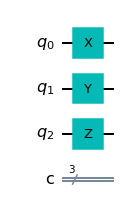

In [7]:
# Define quantum circuit qc_pauli with 3 qubits, 3 bits
qc_pauli = QuantumCircuit(3,3)

# Apply Pauli gates
qc_pauli.x(0)
qc_pauli.y(1)
qc_pauli.z(2)

# Draw the circuit
qc_pauli.draw(output='mpl')

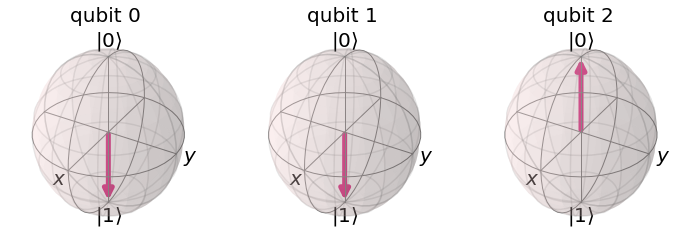

In [8]:
# Execute circuit with the statevector simulator
result_pauli = execute(qc_pauli, sv_backend).result()

# Get statevector representation
vector_pauli = result_pauli.get_statevector(qc_pauli)

# Draw Bloch sphere
plot_bloch_multivector(vector_pauli)

{'011': 1000}


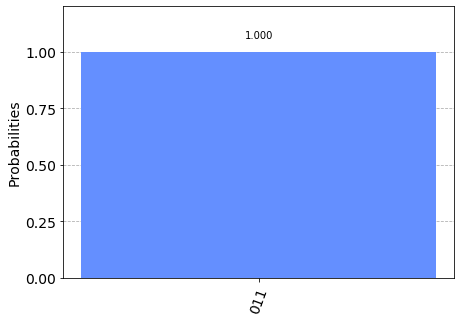

In [9]:
# Add measurement gates
qc_pauli.measure([0,1,2],[0,1,2]);

# Simulate measurements
job = execute(qc_pauli, sim_backend, shots=1000)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)

## Hadamard gate

The Hadamard gate may be used to create **superposition**. It maps the basis state $| 0 \rangle$ to $| + \rangle =\frac{| 0 \rangle + | 1 \rangle }{\sqrt{2}}$, and $| 1 \rangle $ to $ | - \rangle =\frac{ |0 \rangle - |1 \rangle }{\sqrt{2}}$. On the Bloch sphere, $| + \rangle$ and $| - \rangle $ are represented by points on the X axis. 

When measured, these states have equal probability of becoming $| 1\rangle $ or $| 0 \rangle $, since the square modulus of the probability amplitude for each of the basis states has equal value.

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="img/hbloch.png" width="600 px" style="padding-bottom:0.5em;" />
    (<a href="https://qiskit.github.io/ibmqx-user-guides/beginners-guide/005-Single-Qubit_Gates/002-Creating_superposition.html">Source</a>)
</div>

In fact, $|+\rangle $ and $| - \rangle $ **are indistinguishable when measured on the computational basis**. However, the states can be identified by measuring the qubit on the superposition basis, i.e. along the X-axis. A way to achieve this is by simply applying an Hadamard gate before performing the measurement.

**Note**: The Hadamard gate, along with the X, Y and Z gates, is self-inverse: $H.H = I$.

&nbsp;

<div class="alert alert-block alert-info">

**Implementing and testing the Hadamard gate**

&nbsp;

The Hadamard can be implemented on a quantum circuit `qc`, qubit `q_i`, by applying the method `qc.h(q_i)`.

&nbsp;

Implement the gate on the quantum circuit below, and check results by executing the circuit with the `statevector_simulator` and `qasm_simulator`. Check the results for different amounts of qubits.

&nbsp;

**Note**: QuantumCircuit objects may also be instantiated using arbitrary lists of labeled qubits, called quantum registers. The same can be done for bits using classical registers. This is helpful to program more advanced quantum routines/algorithms.


</div>

&nbsp;

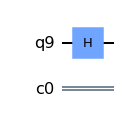

In [10]:
# Define QuantumRegister(n) qr and ClassicalRegister(n) cr, each with n qubits/bits
n = 1
qr = QuantumRegister(n)
cr = ClassicalRegister(n)

# Define QuantumCircuit
qc_h = QuantumCircuit(qr,cr)

# Apply Hadamard gate
qc_h.h(qr)

# Draw the circuit
qc_h.draw(output='mpl')

In [11]:
# Get statevector from simulator
result_h = execute(qc_h, sv_backend).result()
bloch_h = result_h.get_statevector(qc_h)
array_to_latex(bloch_h, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

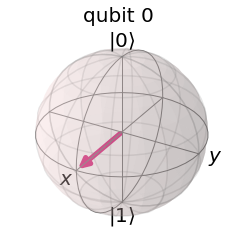

In [12]:
# Draw Bloch sphere from statevector
plot_bloch_multivector(bloch_h)

{'0': 491, '1': 509}


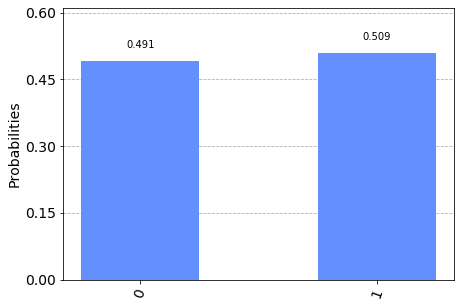

In [13]:
# Add measurement gates
qc_h.measure(qr,cr)

# Simulate measurements
job = execute(qc_h, sim_backend, shots=1000)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)

<div class="alert alert-block alert-info">

**Gates and basis**

&nbsp;

The below diagram is a useful shorthand for quantum states conversion using quantum gates. It also depicts how quantum operations are reversible. A qubit in any of the four states $|0\rangle$, $|1\rangle$, $|-\rangle$, $|+\rangle$  can be converted to any other performing simple one qubit gates.

&nbsp;

<img src="img/h_x_z.png" alt="" width="400 px" align="center">                                                                                                  

&nbsp;

The diagram shows how the Hadamard gate can switch qubits between the computational ($|0\rangle$ and $|1\rangle$) and superposition ($|+\rangle$ and $|-\rangle$) bases. It also shows how the Pauli-Z gate is the bit-flip equivalent of the X gate in the superposition basis:

&nbsp;

$$ X = H.Z.H$$

&nbsp;


</div>

&nbsp;

&nbsp;

# 3. Multi-qubit operations<a id='multi_qubits'></a>

&nbsp;


### Statevectors


In quantum physics we use _statevectors_ to describe the state of our system. Say we wanted to describe the position of a car along a track, this is a classical system so we could use a number $x$:

<img src="img/car_track_1.jpg" width="600px" align="center">

$$ x=4 $$

Alternatively, we could instead use a collection of numbers in a vector called a  _statevector._ Each element in the statevector contains the probability of finding the car in a certain place:

<img src="img/car_track_2.jpg" width="600px" align="center">

$$
|x\rangle = \begin{bmatrix} 0\\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
            \begin{matrix} \\  \\  \\ \leftarrow \\  \\  \\  \\ \end{matrix}
             \begin{matrix} \\  \\ \text{Probability of} \\ \text{car being at} \\ \text{position 4} \\  \\  \\ \end{matrix}   
$$

This isn’t limited to position, we could also keep a statevector of all the possible speeds the car could have, and all the possible colours the car could be. With classical systems (like the car example above), this is a silly thing to do as it requires keeping huge vectors when we only really need one number. However, statevectors happen to be a very good way of keeping track of quantum systems, including quantum computers.


&nbsp;

Multiple qubits can be described with the ket notation. The tensor product is typically implicit; for a state composed of qubits $q_0$, $q_1$ and $q_2$:


&nbsp;

$$
|q_2\rangle \otimes |q_1\rangle \otimes |q_0\rangle =  |q_2\rangle |q_1\rangle |q_0\rangle = |q_2 q_1 q_0\rangle
$$

&nbsp;

For $q_2=1,\, q_1=0,\, q_0=0$ we would use the ket notation $|q_2 q_1 q_0\rangle = |100\rangle$ with statevector representation:

&nbsp;

$$|100\rangle = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$


&nbsp;



## CNOT gate 

&nbsp;

The controlled-NOT (or controlled-$X$) gate is a conditional gate that performs an $X$-gate on the second qubit (target) if the state of the first qubit (control) is $|1\rangle$. 

The CNOT gate is graphically represented as a $\oplus$ on the target qubit, connected to a control qubit denoted as $\bullet$.

&nbsp;

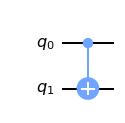

In [14]:
# Create QuantumCircuit with quantum and classical registers
qc_cx = QuantumCircuit(2)

# CNOT gate
qc_cx.cx(0,1)

qc_cx.draw(output='mpl')

&nbsp;

<div class="alert alert-block alert-info">

**Implementing the CNOT gate**

&nbsp;

The CNOT can be implemented on a quantum circuit `qc`, qubit `q_c` as control and qubit `q_t` as target, by applying the method `qc.cx(q_c, q_t)`.

&nbsp;

When our qubits are not in superposition of $|0\rangle$ and $|1\rangle$ (behaving as classical bits), the CNOT is easy to understand. Complete the truth table below by applying the CNOT over different input states.

</div>




|input    |            |output     |            |
|---------|------------|-----------|------------|
|q0 (ctrl)| q1 (target)| q0 (ctrl) | q1 (target)|
|   0     | 0          |    0      |   0        |
|   1     | 0          |    -      |   -        |
|   0     | 1          |    -      |   -        |
|   1     | 1          |    -      |   -        |

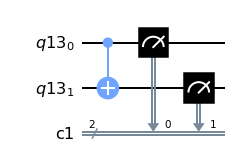

In [15]:
# Create registers and quantum circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc_cnot = QuantumCircuit(qr,cr)

# Change input qubits


# Apply CNOT
qc_cnot.cx(qr[0], qr[1])

# Measure qubits
qc_cnot.measure(qr,cr)

# Draw the circuit
qc_cnot.draw(output='mpl')

{'00': 1000}


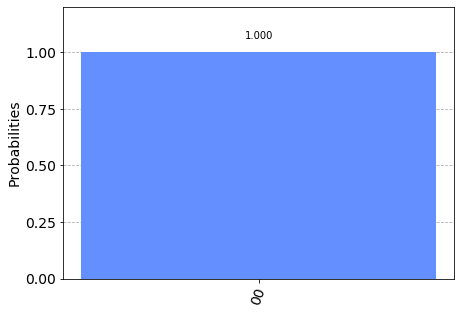

In [16]:
# Simulate measurements
job = execute(qc_cnot, sim_backend, shots=1000)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)

&nbsp;

### Entangling qubits

&nbsp;

What if the control qubit is in a superposition state?

In [17]:
# Create registers and quantum circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc_cnot = QuantumCircuit(qr,cr)

# Apply Hadamard to control qubit
qc_cnot.h(qr[0])

# Apply CNOT
qc_cnot.cx(qr[0], qr[1])

# Get statevector
result_cnot = execute(qc_cnot, sv_backend).result()
sv_cnot = result_cnot.get_statevector(qc_cnot)
array_to_latex(sv_cnot, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

{'00': 491, '11': 509}


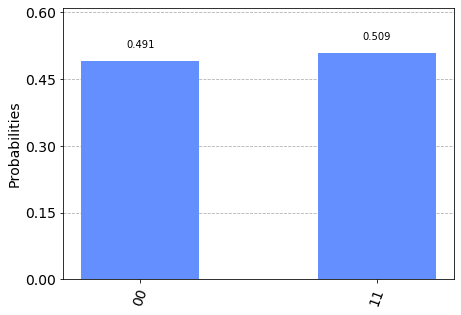

In [18]:
# Simulate measurements
qc_cnot.measure(qr,cr)
job = execute(qc_cnot, sim_backend, shots=1000)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)

&nbsp;

We see we have the state:

$$
\text{CNOT}|q_1 q_0\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

This state is very interesting to us, because it is _entangled._





&nbsp;

<div class="alert alert-block alert-info">
    
What about **entanglement**? </p>

&nbsp;

This combined state cannot be written as two separate qubit states, which has interesting implications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state $|1\rangle$, the collective state of our qubits changes like so:

&nbsp;

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

&nbsp;

Even if we separated these qubits light-years away, measuring one qubit collapses the superposition and appears to have an immediate effect on the other. This is the [‘spooky action at a distance’](https://en.wikipedia.org/wiki/Quantum_nonlocality) that upset so many physicists in the early 20th century.

&nbsp;

</div>

&nbsp;

### Other multi-qubit operations

General single qubit gates together with the $CNOT$ allow for universal quantum computations, i.e. it is possible to decompose any quantum operations over $n$ qubits to arbitrary precision, using only this set of gates. How to efficiently determine and perform such a decomposition, however, is not a trivial problem.
    
Other notable operators:

- __SWAP gate__, which exchanges the state between two qubits;

- __Toffoli gate__ (or **CCNOT**), which performs a NOT operations on a target qubit, using two other qubits as controls.

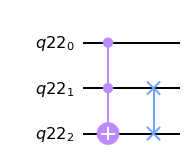

In [19]:
# Create registers and quantum circuit
qr = QuantumRegister(3)
qc_mq = QuantumCircuit(qr)

# Apply Toffoli - first two arguments are the controls
qc_mq.ccx(qr[0], qr[1], qr[2])

# Swap two qubits
qc_mq.swap(qr[1], qr[2])

# Draw the circuit
qc_mq.draw(output='mpl')


## 4. Computation as a diagram: a quantum half-adder<a id='qhd'></a>

&nbsp;

The half adder produces the addition of bits. Classicaly, the inputs **A** and **B** are added, and give the output **S** (sum) and **C** (carry), a bit that flips from $0$ to $1$ if both inputs are $1$.



<img src="img/Half_Adder.png" alt="" width="400 px" align="center">

&nbsp;

The truth table of inputs and outputs is below; consider that $q_0$ is left unchanged after the block, and $q_2$ is in the state $|0\rangle$ at input.


<table>
  <tr>
    <th>$q_0$ (input) = A</th>
    <th>$q_1$ (input) = B</th>
    <th>$q_1$ (output) = S</th>
    <th>$q_2$ (output) = C</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <th>0</th>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
</table>


To build the equivalent block with quantum circuits, we will need 3 qubits, which is the minimum number of qubits to guarantee that this block is reversible. 



<img src="img/q_half_add.png" alt="" width="400 px" align="center">

<div class="alert alert-block alert-info">

**Building a quantum half-adder**

&nbsp;

 1. Using $CNOT$ and/or ***Toffoli*** gates, build a quantum half-adder circuit.</p>
 2. How to interpret the result when the inputs are in superposition?</p>

</div>


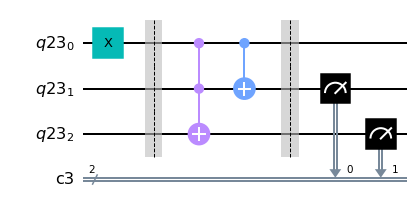

In [20]:
# Create registers
qr = QuantumRegister(3)
cr = ClassicalRegister(2)

# Quantum Circuit
half_adder = QuantumCircuit(qr, cr)

# Prepare input states. Example: A=1, B=0
half_adder.x(qr[0])

# Barriers make circuits prettier
half_adder.barrier()

# Perform multiqubit operations
half_adder.ccx(qr[0],qr[1],qr[2])
half_adder.cx(qr[0],qr[1])


# Barriers make circuits prettier
half_adder.barrier()

# Measure
half_adder.measure(qr[1], cr[0])
half_adder.measure(qr[2], cr[1])

# Draw
half_adder.draw(output='mpl')

{'01': 1000}


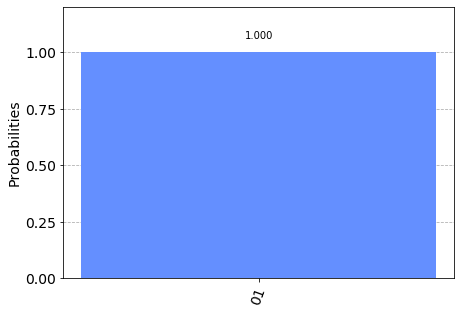

In [21]:
job_ha = execute(half_adder, sim_backend, shots=1000)

counts_ha = job_ha.result().get_counts(half_adder)

print(counts_ha)

plot_histogram(counts_ha)

# 5. IBM Q Provider <a id ='ibmq_provider'></a>
### Running circuits on an real quantum chip

IBM provides access to a real quantum computer through a personal API token. To get your token:

* Create an account at https://quantum-computing.ibm.com/login
* Log in; the API token should be displayed on the Dashboard
* Copy the token to clipboard, paste it into the `API TOKEN` field below.


In [22]:
# Import the IBMQ provider
from qiskit import IBMQ

# Enable account with API credentials:
#IBMQ.save_account('API TOKEN', overwrite=True)

# Load account credentials if token already registered:
IBMQ.load_account()



<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
# Checking the available backends from the IBMQ provider
my_provider_ibmq = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

my_provider_ibmq.backends(operational=True, simulator=False)

[<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [24]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [25]:
# Define backend
#backend = my_provider_ibmq.get_backend('ibmq_belem')

# See backend information
backend

# Or alternatively
# backend_monitor(backend)

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

## Running in Real Device <a id='run_r'></a>

In [26]:
# Monitor queued jobs
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [27]:
# Execute experiment
job_ha_r = execute(half_adder, backend, shots=1000)

# Save job ID if you wish to retrieve results later
#jobID_ha_r = job_ha_r.job_id()

print('JOB ID: {}'.format(jobID_ha_r))

NameError: name 'jobID_ha_r' is not defined

In [ ]:
# Now you can retrieve job using the ID
# job_ha_r=backend.retrieve_job(jobID_ha_r)

# Get measurement information
#counts_run = job_ha_r.result().get_counts(half_adder)

In [ ]:
plot_histogram([counts_run, counts_ha ], legend=[ 'run in real device', 'ideal'])

## Transpiler <a id = 'transpiler'></a> 

In [ ]:
from qiskit.compiler import transpile

half_adder_real = transpile(half_adder, backend=backend)

half_adder_real.draw(output='mpl', scale=0.5)

In [ ]:
half_adder.depth()

In [ ]:
half_adder_real.depth()

In [ ]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_t_real, backend)

&nbsp;

# 6. Quantum teleportation<a id='teleport'></a>

&nbsp;

### Overview

Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state
$\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$. 
This entails passing on information about $\alpha$ and $\beta$ to Bob.

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of $\vert\psi\rangle$ and give the copy to Bob. We can only copy classical states (not superpositions).

However, by taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state $\vert\psi\rangle$ to Bob. We call this teleportation because, at the end, Bob will have $\vert\psi\rangle$ and Alice won't anymore.

To transfer a quantum bit, Alice and Bob must use a third party (Telamon) to send them an entangled qubit pair. Alice then performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.

<img src="img/tele1.jpg" alt="" width="600 px" align="center">

### Quantum teleportation protocol

&nbsp;

We will describe the steps on a quantum circuit below. Here, no qubits are actually ‘sent’, you’ll just have to imagine that part!


In [28]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in different registers

# Qubit to be teleported
psi = QuantumRegister(1, name="psi")

# Entangled pair (1 qubit for Alice, another for Bob)
q_entangled = QuantumRegister(2, name="q_entangled")

# 2 classical bits in 2 diferent registers
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")

# Finally, build circuit
teleportation_circuit = QuantumCircuit(psi, q_entangled, crz, crx)

#### Step 1

A third party, Telamon, creates an entangled pair of qubits and gives one to Bob and one to Alice.

The pair Telamon creates is a special pair called a Bell pair. In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the X-basis ($|+\rangle$ and $|-\rangle$) using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis. 

In [29]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

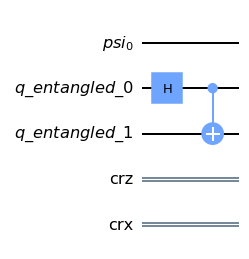

In [30]:
## SETUP
teleportation_circuit = QuantumCircuit(psi, q_entangled, crz, crx)

## STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)

# And view the circuit so far:
teleportation_circuit.draw(output='mpl')

Let's say Telamon sends Alice `q_entangled_0` and Bob `q_entangled_2`.

&nbsp;

#### Step 2 

Alice applies a CNOT gate to `q_entangled_0`, controlled by $\vert\psi\rangle$, the qubit she is trying to teleport to Bob. Then Alice applies a Hadamard gate to $|\psi\rangle$. Her own two qubits are now themselves entangled.

In our quantum circuit, the qubit $|\psi\rangle$ Alice is trying to send is $psi_0$:

&nbsp;

In [31]:
def alice_gates(qc, psi, a):
    qc.barrier() # Use barrier to separate steps
    qc.cx(psi, a)
    qc.h(psi)

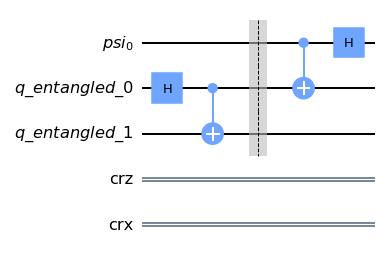

In [32]:
## SETUP
teleportation_circuit = QuantumCircuit(psi, q_entangled, crz, crx)

## STEP 1
# Telamon entangles qubits q1 and q2
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
# Alice entangles her two qubits
alice_gates(teleportation_circuit, 0, 1)

# Visualize circuit so far
teleportation_circuit.draw(output='mpl')

#### Step 3

Next, Alice applies a measurement to both qubits that she owns, $q_1$ and $\vert\psi\rangle$, and stores this result in two classical bits. She then sends these two bits to Bob.

In [33]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

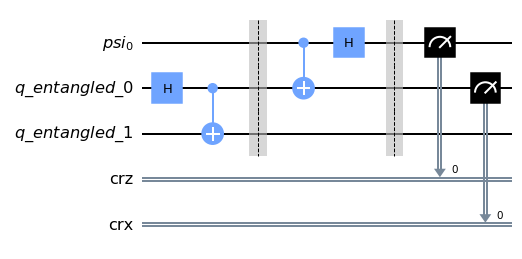

In [34]:
## SETUP
teleportation_circuit = QuantumCircuit(psi, q_entangled, crz, crx)

## STEP 1
# Telamon entangles qubits q1 and q2
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
# Alice entangles her two qubits
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
## Alice measures her qubits, sends results to Bob
measure_and_send(teleportation_circuit, 0 ,1)

# Draw circuit so far
teleportation_circuit.draw(output='mpl')

#### Step 4

Bob, who already has the qubit `q_entangled_1`, then applies the following gates depending on the information (two bits) he received from Alice:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

In [35]:
def bob_gates(qc, qubit, crz, crx):
    qc.barrier()
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

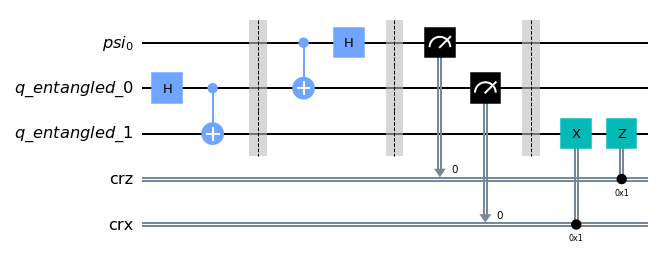

In [36]:
## SETUP
teleportation_circuit = QuantumCircuit(psi, q_entangled, crz, crx)

## STEP 1
# Telamon entangles qubits q1 and q2
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
# Alice entangles her two qubits
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
# Alice measures her qubits, sends results to Bob
measure_and_send(teleportation_circuit, 0 ,1)

## STEP 4
# Bob applies X and/or Z gates depending on the bits he received
bob_gates(teleportation_circuit, 2, crz, crx)

# Visualize circuit
teleportation_circuit.draw(output='mpl')

And voila! At the end of this protocol, Alice's qubit (`psi0`) has now teleported to Bob, in `q_entangled_1`.

&nbsp;

## Testing the protocol

&nbsp;

In this notebook, we will initialize Alice's qubit in a random state $\vert\psi\rangle$ (`psi`). We use the function `random_state` to choose `psi` for us, but feel free to set `psi` to any qubit state you want.

In [37]:
# Create random 1-qubit state
psi0 = random_state(1)

# Display it nicely
array_to_latex(psi0, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

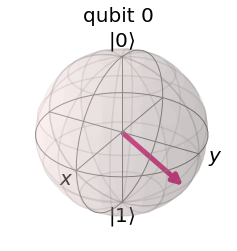

In [38]:
# Show it on a Bloch sphere
plot_bloch_multivector(psi0)

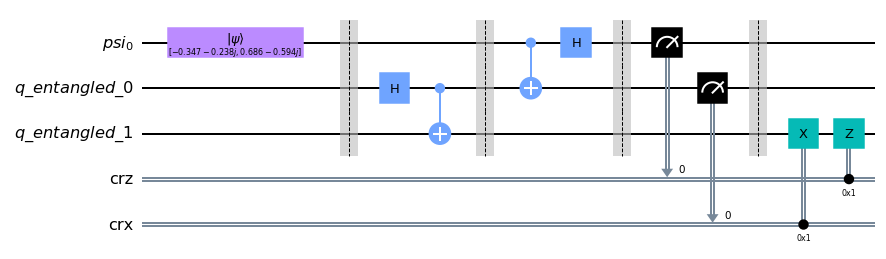

In [39]:
## SETUP
teleportation_circuit = QuantumCircuit(psi, q_entangled, crz, crx)

## STEP 0
# Create |psi>
teleportation_circuit.initialize(psi0,0)
teleportation_circuit.barrier()

## STEP 1
# Telamon entangles qubits q1 and q2
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
# Alice entangles her two qubits
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
# Alice measures her qubits, sends results to Bob
measure_and_send(teleportation_circuit, 0 ,1)

## STEP 4
# Bob applies X and/or Z gates depending on the bits he received
bob_gates(teleportation_circuit, 2, crz, crx)

# Visualize circuit
teleportation_circuit.draw(output='mpl')

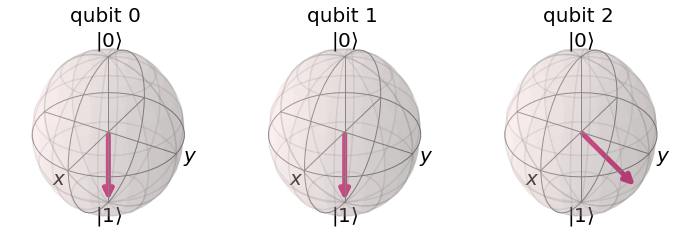

In [42]:
# Get statevector of Bob's qubit
out_vector = execute(teleportation_circuit, sv_backend).result().get_statevector()
plot_bloch_multivector(out_vector)

## Additional Resources





## Thank you!

 - Afonso Rodrigues: afmig1@gmail.com

In [41]:
import qiskit.tools.jupyter
%qiskit_version_table